In [ ]:
import pandas as pd
from copy import deepcopy
from dateutil.relativedelta import relativedelta
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.preprocessing import TransactionEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
orders = pd.read_csv("/content/drive/MyDrive/hack it/Hackathon/Data Details/OneDrive_2023-11-24/3. Data/adjusted_customer_data.csv")
items = pd.read_excel("/content/drive/MyDrive/hack it/Hackathon/Data Details/OneDrive_2023-11-24/3. Data/Campbell Menu Data - 2.xlsx")

In [ ]:
orders

,CustomerID,FirstName,LastName,Email,Phone,DateOfBirth,Gender,OrderDate,OrderTime,OrderSource,OrderType,DishOrdered,OrderAmount,FeedbackRating,FeedbackComments
0,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,09/06/2023,9:15:08,POS,Takeout,"Well Tequila Dbl, Absolut Citrus Dbl, HH Red W...",88.95,4,Enjoyed the HH Red Wine Flight. Well-made and ...
1,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,05/01/2023,16:22:35,QR,Takeout,"Bulliet Rye Dbl, Ketel One Dbl",50.00,2,Found the Bulliet Rye Dbl lacking. It's just o...
2,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,16/11/2022,11:42:13,Kiosk,Takeout,Side Fries,6.00,4,Really liked the Side Fries. Quite satisfying.
3,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,25/05/2022,19:42:42,Call-in,Takeout,"HH Mojito Flight, Beer Flight",31.00,2,Beer Flight was mediocre. Could be much better.
4,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,04/05/2022,16:05:42,DoorDash,Takeout,"Coke, Empanada Flight, Empress Dbl",50.95,3,"Empress Dbl was decent, but I've had better."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5825,1000,FirstName1000,LastName1000,customer1000@example.com,243-562-1675,20/11/1967,Other,29/07/2022,14:55:13,Kiosk,Dine-in,"HH Old Fashioned Flight, Two Beef Tacos",25.00,2,Found the HH Old Fashioned Flight lacking. It'...
5826,1000,FirstName1000,LastName1000,customer1000@example.com,243-562-1675,20/11/1967,Other,14/04/2022,15:42:59,DoorDash,Delivery,"Cabernet - Sebastiani - Glass, Side Fries, Mos...",51.95,2,Cabernet - Flights Founder's Label - Glass was...
5827,1000,FirstName1000,LastName1000,customer1000@example.com,243-562-1675,20/11/1967,Other,05/04/2022,19:04:01,Call-in,Takeout,"Casamigos Mezcal, Heineken 0.0",21.00,4,Enjoyed the Heineken 0.0. Well-made and tasty.
5828,1000,FirstName1000,LastName1000,customer1000@example.com,243-562-1675,20/11/1967,Other,09/02/2022,13:00:27,DoorDash,Takeout,"Orange Juice, Malibu Dbl, Don Julio 70, Caesar...",53.95,3,Average experience with Don Julio 70. Nothing ...


In [ ]:
items

,id,itemName,itemDescription,itemPrice,preparationTime,Category,Allergens
0,1,Around the World,One of each of our signature food flights incl...,17.50,15.0,Signature Flights,"Dairy , Egg, Gluten, Nitrates, Tree Nuts, Pean..."
1,2,Slider Flight,"Bacon cheeseburger with flight sauce, buffalo ...",19.95,10.0,Signature Flights,"Dairy , Egg, Gluten"
2,3,Taco Flight,"Steak, chicken, and carnitas, served in warm t...",17.95,11.0,Signature Flights,"Dairy , Egg"
3,4,Fry Flight,"Truffle & parmesan, garlic & rosemary, sweet &...",16.95,12.0,Signature Flights,Dairy
4,5,Mac & Cheese Flight,"Classic 4 cheese, crispy bacon mac and cheese ...",18.95,14.0,Signature Flights,"Dairy , Egg, Gluten, Mushrooms"
...,...,...,...,...,...,...,...
320,321,HH Morena Mia,NaN,5.00,5.0,Monday Happy Hour,NaN
321,322,HH Hazy Sierra,NaN,5.00,5.0,Monday Happy Hour,NaN
322,323,HH Hapa IPA,NaN,5.00,5.0,Monday Happy Hour,NaN
323,324,HH Blue Moon,NaN,5.00,5.0,Monday Happy Hour,NaN


## LLM

In [ ]:
!pip install -q --upgrade accelerate
!pip install -q transformers torch accelerate bitsandbytes
!pip install -q langchain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.6/92.6 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 kB 5.7 MB/s eta 0:00:00


In [ ]:
# Imports
import torch, transformers
from langchain.chains import LLMChain
from langchain.prompts import PromptTemplate
from langchain.llms import HuggingFacePipeline
from langchain.memory import ConversationBufferMemory
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

In [ ]:
def get_prompt(instruction_prompt=None, system_prompt=None):
    """
    This function generates a LLM prompt template with optional instruction and system prompts.

    Input:
    - instruction_prompt (str): A string that provides instructions for the model.
    - system_prompt (str): A string that sets the system's behavior and guidelines.

    Output:
    - prompt_template (str): The assembled LLM prompt template with both instruction and system prompts.
    """

    ## Tags (Instructions & System)
    Begin_Instruction, End_Instruction = "[INST]", "[/INST]"
    Begin_System, End_System = "<<SYS>>\n", "\n<</SYS>>\n\n"

    ## System Prompt
    if system_prompt is None:
        system_prompt = """\
        You are a helpful marketing agent and content writer for restaurants that writes textual content like message, email,prompts for stable diffusion models etc for offers like
        discount offer, promotional offer, special day offer, birthday offer and items like item of the day, item of the week,text to image generation etc."""

    ## User Prompt
    if instruction_prompt is None:
        instruction_prompt = "User: {user_input}"

    ## Assembled Prompt (System & User)
    SYSTEM_PROMPT = Begin_System + system_prompt + End_System
    prompt_template =  Begin_Instruction + SYSTEM_PROMPT + instruction_prompt + End_Instruction
    return prompt_template

def prompt_template():
    """
    This function generates a prompt template and initializes conversation storage.

    Output:
    - prompt (PromptTemplate): A template for LLM prompts, including conversation variables.
    - memory (ConversationBufferMemory): A memory buffer for storing chat history.
    """

    ## Prompt Format
    template = get_prompt()
    prompt = PromptTemplate(input_variables=["user_input"], template=template)

    return prompt

def LLM(name='NousResearch/Llama-2-7b-chat-hf'):
    """
    This function initializes a Language Model (LLM) for text generation using Hugging Face's Transformers library.

    Input:
    - name (str): The name or identifier of the pre-trained model to load.

    Output:
    - llm (HuggingFacePipeline): A language model for text generation.
    """

    ## Load Tokenizer
    tokenizer = AutoTokenizer.from_pretrained(name)

    ## Load Pre-Trained Model
    model = AutoModelForCausalLM.from_pretrained(name,
                                                device_map='auto',
                                                torch_dtype=torch.float16,
                                                load_in_4bit=True)

    ## Create Text Genration Pipeline
    from transformers import pipeline
    pipe = pipeline("text-generation",
                    model=model,
                    tokenizer=tokenizer,
                    torch_dtype=torch.bfloat16,
                    device_map="auto",
                    max_new_tokens=512,
                    do_sample=True,
                    top_k=30,
                    num_return_sequences=1,
                    eos_token_id=tokenizer.eos_token_id)

    ## LLM Setup using Hugging Face's pipeline
    llm = HuggingFacePipeline(pipeline=pipe, model_kwargs={'temperature': 0.5})
    return llm

def chain():
    """
    This function creates and initializes a text generation chain using the provided language model (LLM), prompt, and memory.

    Input:
    - llm (HuggingFacePipeline): The language model for text generation.
    - prompt (PromptTemplate): The template for GPT-3 prompts, including conversation variables.
    - memory (ConversationBufferMemory): The conversation memory buffer for storing chat history.

    Output:
    - llm_chain (LLMChain): A text generation chain with the specified components.
    """
    # Load LLM
    prompt = prompt_template()
    llm = LLM()

    # Create and initialize a text generation chain using LLM, prompt, and memory
    llm_chain = LLMChain(llm=llm, prompt=prompt, verbose=False)
    return llm_chain

def display(text, screen_width=90):
    """
    Format text within a specified screen width, preserving word boundaries.

    Args:
        text (str): The input text to be formatted.
        screen_width (int, optional): The desired screen width. Defaults to 90.

    Returns:
        str: The formatted text.
    """

    # Split the input text into lines
    import textwrap
    lines = text.splitlines()

    # Initialize the formatted text
    formatted_text = ""

    # Format within the specified width
    for line in lines:
        wrapped_lines = textwrap.wrap(line, width=screen_width, expand_tabs=False, replace_whitespace=False)
        formatted_text += "\n".join(wrapped_lines) + "\n"

    return formatted_text

In [ ]:
bot = chain()

tokenizer_config.json:   0%|          | 0.00/746 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/21.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/435 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/583 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/26.8k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/9.98G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/179 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:381: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:386: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.6` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`. This was detected when initializing the generation config instance, which means the corresponding file may hold incorrect parameterization and should be fixed.
  warnings.warn(


## Dataset

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Hackathon/Data Details/OneDrive_2023-11-24/3. Data/adjusted_customer_data.csv")

In [ ]:
data.head(3)

,CustomerID,FirstName,LastName,Email,Phone,DateOfBirth,Gender,OrderDate,OrderTime,OrderSource,OrderType,DishOrdered,OrderAmount,FeedbackRating,FeedbackComments
0,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,09/06/2023,9:15:08,POS,Takeout,"Well Tequila Dbl, Absolut Citrus Dbl, HH Red W...",88.95,4,Enjoyed the HH Red Wine Flight. Well-made and ...
1,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,05/01/2023,16:22:35,QR,Takeout,"Bulliet Rye Dbl, Ketel One Dbl",50.00,2,Found the Bulliet Rye Dbl lacking. It's just o...
2,1,FirstName1,LastName1,customer1@example.com,815-759-9160,01/05/1992,Other,16/11/2022,11:42:13,Kiosk,Takeout,Side Fries,6.00,4,Really liked the Side Fries. Quite satisfying.


In [ ]:
items[items['Category'] == 'Weekly Specials']

,id,itemName,itemDescription,itemPrice,preparationTime,Category,Allergens
310,311,$2 Taco,NaN,2.0,5.0,Weekly Specials,"Dairy , Egg"
311,312,Wednesday Wings 6,NaN,0.0,5.0,Weekly Specials,NaN
312,313,$5 Burger,NaN,5.0,5.0,Weekly Specials,"Dairy , Egg, Gluten, tomato"


## Birthday Offer
- On birthday, make bundle of favorite things and give discount.

In [ ]:
from datetime import datetime
from collections import Counter

In [ ]:
def top_items(data):
  fav_items = ''
  for i in data['DishOrdered']:
    fav_items += i
    fav_items += ', '

  fav_items = fav_items.split(', ')
  fav_items.pop()

  item_counts = Counter(fav_items)

  # Get the top 5 most common items
  top_items = item_counts.most_common(3)
  items = ''
  lister = []
  for item, frequency in top_items:
      lister.append(item)
      items = items + item + ' , '

  return items , lister

In [ ]:
def message(name, items_LLM, total_price, discount_percent, after_discount):

    prompt = f"""Generate a birthday offer message for the customer in email format using customer data from our restaurant.
          Congratulate the customer and give him discount message on his liked products as given in Customer Data.
          Do not do any further calculation, display prices gien by me.

          Our Restaurant Name: AIO

          Customer Data is given below.
          Customer Name: {name}
          Bundle Items: {items_LLM}
          Actual Price: {total_price}
          Discount Percent: {discount_percent}
          After Discount Price: {after_discount}

          Output Format : Subject, Message
          """
    m = bot.predict(user_input=prompt)
    return m

In [ ]:
def birthday_message():

  birthday_messages = {}
  today_date = datetime.now().strftime("%d-%m")
  df_no_duplicates = data.drop_duplicates(subset='Email')

  for i, v in df_no_duplicates.iterrows():

    date = v['DateOfBirth']
    date = date.replace('/' , '-')[:5]

    if today_date == date:
      emails = data[data['Email'] == v['Email']]
      items_LLM , lister = top_items(emails)
      prices = item_data[item_data['itemName'].isin(lister)].set_index('itemName').reindex(lister)['itemPrice'].tolist()

      name = emails['FirstName'].values[0] + ' ' + emails['LastName'].values[0]
      total_price = sum(prices)
      discount_percent = 0.05
      after_discount = total_price * discount_percent

      m = message(name, items_LLM, total_price, discount_percent, after_discount)
      birthday_messages[emails['Email'].iloc[0]] = m

  return birthday_messages

In [ ]:
message = birthday_message()
print(message)

{'customer977@example.com': "  Sure, here is the birthday offer message for the customer in email format using the customer data provided:\n\nSubject: Happy Birthday from AIO! 🎉\n\nDear FirstName977 LastName977,\n\nHappy birthday to our wonderful customer! 🎉 We hope your day is filled with joy, love, and of course, delicious food! 🍴\n\nTo celebrate this special day, we would like to offer you a discount of 0.05% on your favorite items from our menu. Simply use the code BIRTHDAYGIFT at checkout to redeem your offer.\n\nHere are the items you have selected from our menu:\n\n* Ketel One\n* Long Island Iced Tea\n* Jameson Dbl\n\nThe total cost of these items before the discount is $52.00. Now, with the discount, the total cost after the offer is $2.60. 💰\n\nDon't miss out on this amazing deal! Visit our restaurant today and enjoy your favorite dishes at a discounted price. We look forward to serving you!\n\nWarm regards,\n\nThe AIO Team"}


## Generated Message

In [ ]:
print(message['customer977@example.com'])

  Sure, here is the birthday offer message for the customer in email format using the customer data provided:

Subject: Happy Birthday from AIO! 🎉

Dear FirstName977 LastName977,

Happy birthday to our wonderful customer! 🎉 We hope your day is filled with joy, love, and of course, delicious food! 🍴

To celebrate this special day, we would like to offer you a discount of 0.05% on your favorite items from our menu. Simply use the code BIRTHDAYGIFT at checkout to redeem your offer.

Here are the items you have selected from our menu:

* Ketel One
* Long Island Iced Tea
* Jameson Dbl

The total cost of these items before the discount is $52.00. Now, with the discount, the total cost after the offer is $2.60. 💰

Don't miss out on this amazing deal! Visit our restaurant today and enjoy your favorite dishes at a discounted price. We look forward to serving you!

Warm regards,

The AIO Team


In [ ]:
print(message['customer977@example.com'])

  Sure! Here is the birthday offer message for the customer in email format based on the customer data provided:

Subject: Happy Birthday from AIO! 🎉

Dear FirstName977 LastName977,

Happy birthday to you! 🎉 We hope you're having a fantastic day and enjoying every moment of it. As a small token of appreciation for being a valued customer at AIO, we would like to offer you a special discount on your favorite items.

We've taken a look at your Customer Data, and we see that you love Ketel One, Long Island Iced Tea, Jameson Dbl, and more! As a birthday treat, we'd like to give you 5% off these items. Here's what you can enjoy:

* Ketel One: Was $52.00, now $2.60 (after discount)
* Long Island Iced Tea: Was $52.00, now $2.60 (after discount)
* Jameson Dbl: Was $52.00, now $2.60 (after discount)

Enjoy your discount and have a wonderful day! Don't forget to treat yourself to a great meal at AIO to celebrate your special day. We're always here to serve you with the best food and services.

T

In [ ]:
print(m)

  Sure, I'd be happy to help! Based on the customer data you provided, here is a birthday offer message for the customer in email format:

Subject: Happy Birthday! 🎉 Enjoy 5% Off Your Favorites 🎁

Dear FirstName977,

Happy birthday to you! 🎉 We hope you're having an amazing day and enjoying every moment of it. As a small gift to you on your special day, we'd like to offer you 5% off on your favorite items! 🎁

As you know, you've been a loyal customer at our restaurant, and we want to show you how much we appreciate your support. So, here's your chance to treat yourself to some of the delicious items on our menu, including:

* Ketel One Vodka
* Long Island Iced Tea
* Jameson Double Barreled Whiskey

Don't miss out on this amazing offer! Simply use the code BIRTHDAY5 at checkout to get your discount. 😊

Thank you for being a part of our restaurant family, and we hope to see you soon!

Warm Regards,

[Your Name]

I hope this message meets your requirements. Let me know if you need any fur

## Level - 3 Churn Customer Retention Message

In [ ]:
def churn_message(name, items_LLM, total_price, discount_percent, after_discount):

    prompt = f"""Generate a customer retention message for the customer in email format using customer data from our restaurant.
          Tell him that we Express Gratitude that they were our customer, Highlight their Value, and give them personalized discount offer using below data.
          Do not do any further calculation, display prices gien by me.

          Our Restaurant Name: AIO

          Customer Data is given below.
          Customer Name: {name}
          Favorite Items: {items_LLM}
          Actual Price: {total_price}
          Discount Percent: {discount_percent}
          After Discount Price: {after_discount}

          Output Format : Subject, Message
          """
    m = bot.predict(user_input=prompt)
    return m

In [ ]:
churn_df = pd.read_csv('/content/drive/MyDrive/hack it/Hackathon/Data Details/OneDrive_2023-11-24/3. Data/Churn_column_dataset.csv', index_col=0)

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/hack it/Hackathon/Data Details/OneDrive_2023-11-24/3. Data/adjusted_customer_data.csv")

In [ ]:
item_data = pd.read_excel("/content/drive/MyDrive/hack it/Hackathon/Data Details/OneDrive_2023-11-24/3. Data/Campbell Menu Data - 2.xlsx")

In [ ]:
def churn_message_pipeline():

    churn_m = {}
    df = churn_df[churn_df['Churn'] == True]
    unique_data = df.drop_duplicates(subset='CustomerID')
    email = unique_data['Email'].unique()[0]
    email = data[data['Email'] == email]

    items_LLM , lister = top_items(email)
    prices = item_data[item_data['itemName'].isin(lister)].set_index('itemName').reindex(lister)['itemPrice'].tolist()

    name = email['FirstName'].values[0] + ' ' + email['LastName'].values[0]
    total_price = sum(prices)
    discount_percent = 0.30
    after_discount = total_price * discount_percent

    m = churn_message(name, items_LLM, total_price, discount_percent, after_discount)
    churn_m[email['Email'].iloc[0]] = m

    return churn_m

In [ ]:
messenger = churn_message_pipeline()

In [ ]:
print(messenger['customer2@example.com'])

  Sure, I'd be happy to help you generate a customer retention message for one of your regular customers at AIO restaurant. Here's an example message based on the data you provided:

Subject: AIO Gratitude and Discount Offer!

Dear [Customer's First Name],

We hope this message finds you well! At AIO, we are beyond grateful that you have chosen to dine with us multiple times, and we want to express our appreciation for your loyalty. As a token of our gratitude, we would like to offer you a special discount on your next visit.

Based on your favorite items and purchase history, we have identified that you enjoy our Fry Flight, Casamigos Anejo, and Paloma. We are thrilled to offer you a 30% discount on any of these items during your next visit. The discounted price will be [After Discount Price].

We value your loyalty and cannot wait to serve you again. Simply show this email at the time of purchase to enjoy the discount.

Thank you for choosing AIO as your go-to restaurant. We look for

General Message

In [ ]:
def churn_message():

    prompt = f"""Generate a customer retention message for the customers in email format from our restaurant.

          Generate a general message that we have discounts going on.
          Our Restaurant Name: AIO
          Output Format : Subject, Message
          """
    m = bot.predict(user_input=prompt)
    return m

In [ ]:
g_message = churn_message()

In [ ]:
print(g_message)

  Sure, I'd be happy to help you with that! Here's a customer retention message for your restaurant:

Subject: 🍴 Exclusive Savings Just For You! 🎁

Dear [Customer Name],

We hope this message finds you well! At AIO Restaurant, we value our loyal customers like you and want to show our appreciation with some exclusive savings. 😊

We're offering a special discount on all your favorite dishes this weekend! From comforting classics to modern twists, you'll find something to delight your taste buds. Plus, don't miss out on our daily specials and features, available now through Sunday. 📝

As a valued customer, you deserve a treat every now and then, and we're glad to provide you with a little something extra. Enjoy your meal and don't forget to follow us on social media for more updates and promotions! 👍

Happy dining!

Best regards,

[Your Name/Restaurant Name]

Of course, you can customize this message according to your restaurant's branding and tone. Don't forget to include the necessary 

In [ ]:
items.itemPrice[311]=4

<ipython-input-29-1be876903e67>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  items.itemPrice[311]=4


##Items Of The Week

In [ ]:
def top_items():
  itemss = ''
  lister = []
  for item in items[items['Category'] == 'Weekly Specials'].itemName.values:
      lister.append(item)
      itemss = itemss + item + ' , '

  return itemss , lister

In [ ]:
def iotw_message(name, items_LLM, total_price, discount_percent, after_discount):

    prompt = f"""Generate a customer retention message for the customer in email format using customer data from our restaurant.
          Tell him that we Express Gratitude that they were our customer, Highlight their Value, and give them personalized discount offer using below data.
          Do not do any further calculation, display prices gien by me.

          Our Restaurant Name: AIO

          Customer Data is given below.
          Customer Name: {name}
          Favorite Items: {items_LLM}
          Actual Price: {total_price}
          Discount Percent: {discount_percent}
          After Discount Price: {after_discount}

          Output Format : Subject, Message
          """
    m = bot.predict(user_input=prompt)
    return m

In [ ]:
def item_of_the_week_message_pipeline():

    churn_m = {}
    df = orders
    unique_data = df.drop_duplicates(subset='CustomerID')
    email = unique_data['Email'].unique()[0]
    email = data[data['Email'] == email]

    items_LLM , lister = top_items()
    name = email['FirstName'].values[0] + ' ' + email['LastName'].values[0]
    total_price = items[items['Category'] == 'Weekly Specials']['itemPrice'].values.sum()
    discount_percent = 0.10
    after_discount = total_price * 0.90

    m = iotw_message(name, items_LLM, total_price, discount_percent, after_discount)
    churn_m[email['Email'].iloc[0]] = m

    return churn_m

In [ ]:
g_message = item_of_the_week_message_pipeline()

In [ ]:
print(g_message['customer1@example.com'])

  Sure, I'd be happy to help you generate a customer retention message for your restaurant customer! Here's an example email message based on the customer data you provided:

Subject: Thank you for choosing AIO! 🙏🏼

Dear [CustomerName],

We hope this message finds you well! 😊 At AIO, we want to express our heartfelt gratitude for choosing our restaurant as your go-to spot for delicious food. 🍔🔥 We value each and every one of our customers, and we're thrilled to have you as a part of our AIO family! 💕

We noticed that you've been enjoying some of our signature items, like our $2 Tacos on Tuesdays and your favorite $5 Burger on Fridays! 🍟👌 You've shown us that you have great taste in food, and we're glad you choose to dine with us. 💯

As a token of our appreciation, we would like to offer you a special discount on your next visit! 🎉 For being an amazing customer, we're giving you a 10% discount off your total bill. Just use the code GRATITUDE2023 at checkout to redeem your offer. 😍

Here

##PROMOTIONAL IMAGE GENERATION

In [ ]:
def generate_item_promotion_prompt( items):
    item_list = ", ".join(items)

    prompt = f"""Generate a promotional image for the weekly popular items to be used in marketing materials.
    Showcase the exciting offers and the value customers can get from our restaurant using the details provided below. Add more details about the items.

    Our Restaurant Name: AIO Restraunt
    Weekly Popular Items: {item_list}

    Output Format: Prompt For Image Generator Model
    """
    m = bot.predict(user_input=prompt)
    return m

In [ ]:
itemin=items[items['Category'] == 'Weekly Specials']['itemName'].values

In [ ]:
print(generate_item_promotion_prompt(itemin))

  Great! Here's a prompt for a text-to-image generator model to create a promotional image for your weekly popular items:

---

**Prompt: Create an eye-catching image that showcases AIO Restaurant's weekly popular items and highlights the following offers:**

🔹 $2 Taco on Mondays
🔹 Wednesday Wings 6 for only $6
🔹 $5 Burger every day

**Additional Instructions:**

* Use vibrant colors to grab the attention of potential customers.
* Incorporate the AIO Restaurant logo and branding elements to create a cohesive look.
* Use visuals to emphasize the value and quality of the weekly popular items.
* Include a clear call-to-action (CTA) to encourage customers to visit the restaurant or order online.

---

Now, the text-to-image generator model will generate a visually appealing image based on the prompt you provided. This image will help you in your marketing materials to showcase the exciting offers and the value customers can get from your restaurant.


In [ ]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [ ]:
!pip install diffusers transformers accelerate --upgrade
!pip install --upgrade Pillow
from diffusers import AutoPipelineForText2Image
import torch
from PIL import Image, ImageDraw, ImageFont

In [ ]:
pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16")
pipe.to("cuda")


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.24.0",
  "_name_or_path": "stabilityai/sdxl-turbo",
  "feature_extractor": [
    null,
    null
  ],
  "force_zeros_for_empty_prompt": true,
  "image_encoder": [
    null,
    null
  ],
  "scheduler": [
    "diffusers",
    "EulerAncestralDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['visuals to emphasize the value and quality of the weekly popular items. * include a clear call - to - action ( cta ) to encourage customers to visit the restaurant or order online.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['visuals to emphasize the value and quality of the weekly popular items. * include a clear call - to - action ( cta ) to encourage customers to visit the restaurant or order online.']


  0%|          | 0/2 [00:00<?, ?it/s]

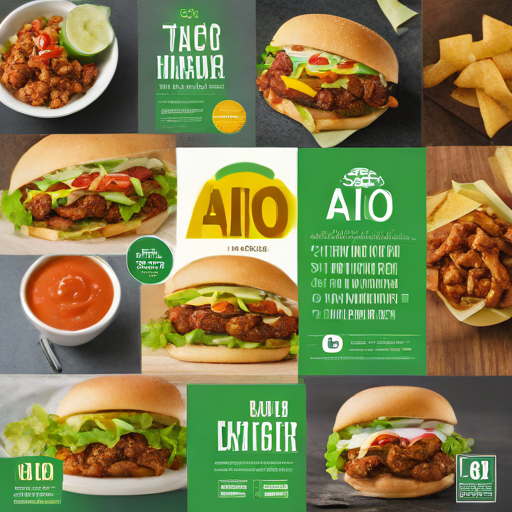

In [ ]:
prompt = """ Create an eye-catching image that showcases AIO Restaurant's weekly popular items and highlights the following offers:**

$2 Taco on Mondays
Wednesday Wings 6 for only $6
$5 Burger every day

**Additional Instructions:**

* Use vibrant colors to grab the attention of potential customers.
* Incorporate the AIO Restaurant logo and branding elements to create a cohesive look.
* Use visuals to emphasize the value and quality of the weekly popular items.
* Include a clear call-to-action (CTA) to encourage customers to visit the restaurant or order online."""

image = pipe(prompt=prompt, num_inference_steps=2, guidance_scale=0.30).images[0]
image

In [ ]:
image.save("generated_image.jpg")

In [ ]:
def textadder(path):
    # Assuming 'image' contains your generated image
    # Load the image
    generated_image = Image.open(path)
    draw = ImageDraw.Draw(generated_image)

    # Define text to be placed
    text_to_add = "Special Week Announcement"

    # Use a system font (Arial) and size
    font = ImageFont.load_default(size=26)

    # Define text position (adjust coordinates as needed)
    text_position = (100, 20)

    # Define text color
    text_color = (255, 255, 255)  # Assuming white color, format: (R, G, B)

    # Add text to the image
    draw.text(text_position, text_to_add, fill=text_color, font=font)

    # Save or display the modified image
    return generated_image

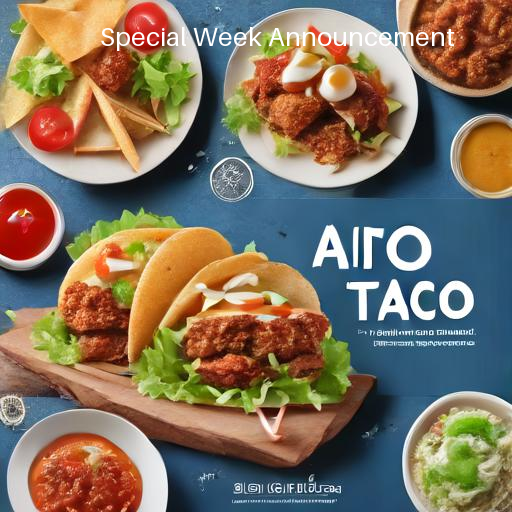

In [ ]:
textadder("generated_image.jpg")

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a consistent and recognizable identity. - leverage imagery to spotlight the premium quality and value of our weekly popular items. - craft a compelling call - to - action ( cta ) to motivate customers to visit the restaurant or order online for a delightful experience.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['a consistent and recognizable identity. - leverage imagery to spotlight the premium quality and value of our weekly popular items. - craft a compelling call - to - action ( cta ) to motivate customers to visit the restaurant or order online for a delightful experience.']


  0%|          | 0/2 [00:00<?, ?it/s]

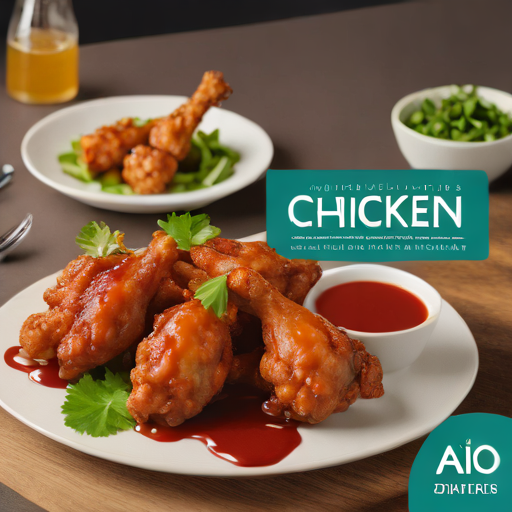

In [ ]:
prompt = """Design a captivating visual that highlights AIO Restaurant's weekly popular items with enticing offers:

Our Featured Dish: Succulent Chicken Wings garnished with zesty spices and served with a side of tangy ketchup.

**Additional Instructions:**

- Infuse vibrant colors and dynamic visuals to captivate potential customers' attention.
- Integrate the AIO Restaurant logo and brand elements seamlessly for a consistent and recognizable identity.
- Leverage imagery to spotlight the premium quality and value of our weekly popular items.
- Craft a compelling call-to-action (CTA) to motivate customers to visit the restaurant or order online for a delightful experience.
"""
image = pipe(prompt=prompt, num_inference_steps=2, guidance_scale=0.0).images[0]
image

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['appeal and appetite. - employ enticing visual elements to underscore the irresistible taste and quality of our beef burger. - ensure meticulous attention to detail in portraying each layer of the burger for a mouthwatering presentation. - create a call - to - action that entices customers to savor this delectable burger experience.']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['appeal and appetite. - employ enticing visual elements to underscore the irresistible taste and quality of our beef burger. - ensure meticulous attention to detail in portraying each layer of the burger for a mouthwatering presentation. - create a call - to - action that entices customers to savor this delectable burger experience.']


  0%|          | 0/3 [00:00<?, ?it/s]

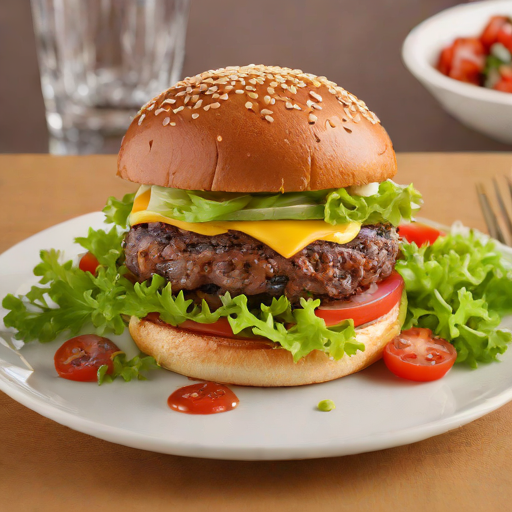

In [ ]:
prompt = """Craft an enticing visual centerpiece highlighting our signature Beef Burger, an absolute delight for burger enthusiasts:

Indulge in the Juicy Beef Burger:
- Succulent beef patty cooked to perfection, layered with fresh lettuce, ripe tomatoes, melted cheese, and a secret special sauce, all nestled within a soft, toasted bun.

**Additional Instructions:**

- Employ vibrant and inviting colors that stimulate visual appeal and appetite.
- Employ enticing visual elements to underscore the irresistible taste and quality of our Beef Burger.
- Ensure meticulous attention to detail in portraying each layer of the burger for a mouthwatering presentation.
- Create a call-to-action that entices customers to savor this delectable burger experience.
"""
image = pipe(prompt=prompt, num_inference_steps=3, guidance_scale=0.0).images[0]
image

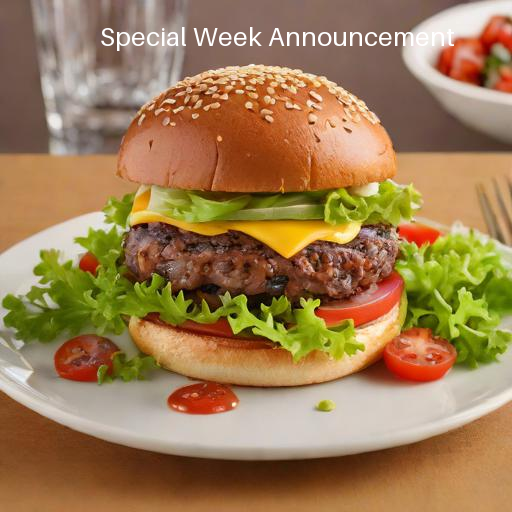

In [ ]:
image.save("generated_image.jpg")
textadder("generated_image.jpg")